### Imports

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Importing Dataset

In [91]:
df = pd.read_excel('AutoMPG_data.xlsx')

In [92]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [93]:
df = df.drop(['GallonsPer100MilesTo1981', 'MPG', 'Name'], axis=1)
df.describe()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,0.923469,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.266185,0.805518,0.484742,0.379136,0.401656
min,2.145923,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,11.111111,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GallonsPer100Miles  392 non-null    float64
 1   Cylinders           392 non-null    int64  
 2   Displacement100ci   392 non-null    float64
 3   Horsepower100       392 non-null    float64
 4   Weight1000lb        392 non-null    float64
 5   Seconds0to60        392 non-null    float64
 6   Year                392 non-null    int64  
 7   Year70To81          392 non-null    int64  
 8   Origin              392 non-null    int64  
 9   Origin.Eq.1         392 non-null    int64  
 10  Origin.Eq.2         392 non-null    int64  
 11  Origin.Eq.3         392 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 36.9 KB


In [95]:
df.isnull().values.any()

False

### Min + max

In [96]:
print("\nCylinders:")
print("Max: " + str(df["Cylinders"].max()))
print("Min: " + str(df["Cylinders"].min()))

print("\nDisplacement100ci:")
print("Max: " + str(df["Displacement100ci"].max()))
print("Min: " + str(df["Displacement100ci"].min()))

print("\nHorsepower100:")
print("Max: " + str(df["Horsepower100"].max()))
print("Min: " + str(df["Horsepower100"].min()))

print("\nWeight1000lb:")
print("Max: " + str(df["Weight1000lb"].max()))
print("Min: " + str(df["Weight1000lb"].min()))

print("\nSeconds0to60:")
print("Max: " + str(df["Seconds0to60"].max()))
print("Min: " + str(df["Seconds0to60"].min()))


Cylinders:
Max: 8
Min: 3

Displacement100ci:
Max: 4.55
Min: 0.68

Horsepower100:
Max: 2.3
Min: 0.46

Weight1000lb:
Max: 5.14
Min: 1.613

Seconds0to60:
Max: 24.8
Min: 8.0


### Histograms

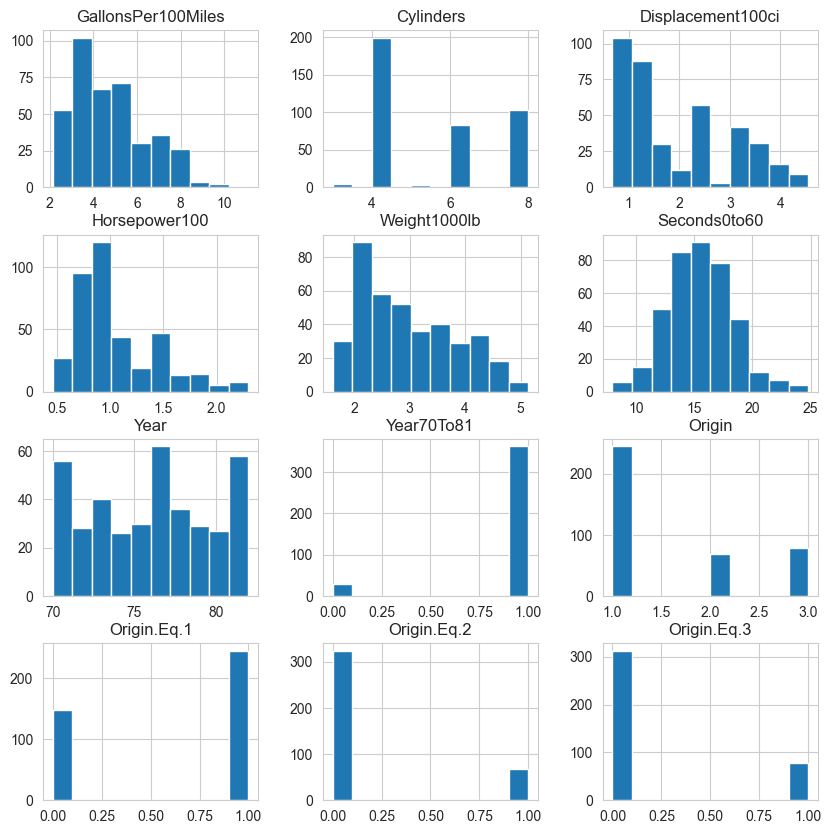

In [97]:
df1 = df[['GallonsPer100Miles', 'Weight1000lb', 'Horsepower100', 'Cylinders', 'Displacement100ci']]
df.hist(figsize=(10,10))
plt.show()

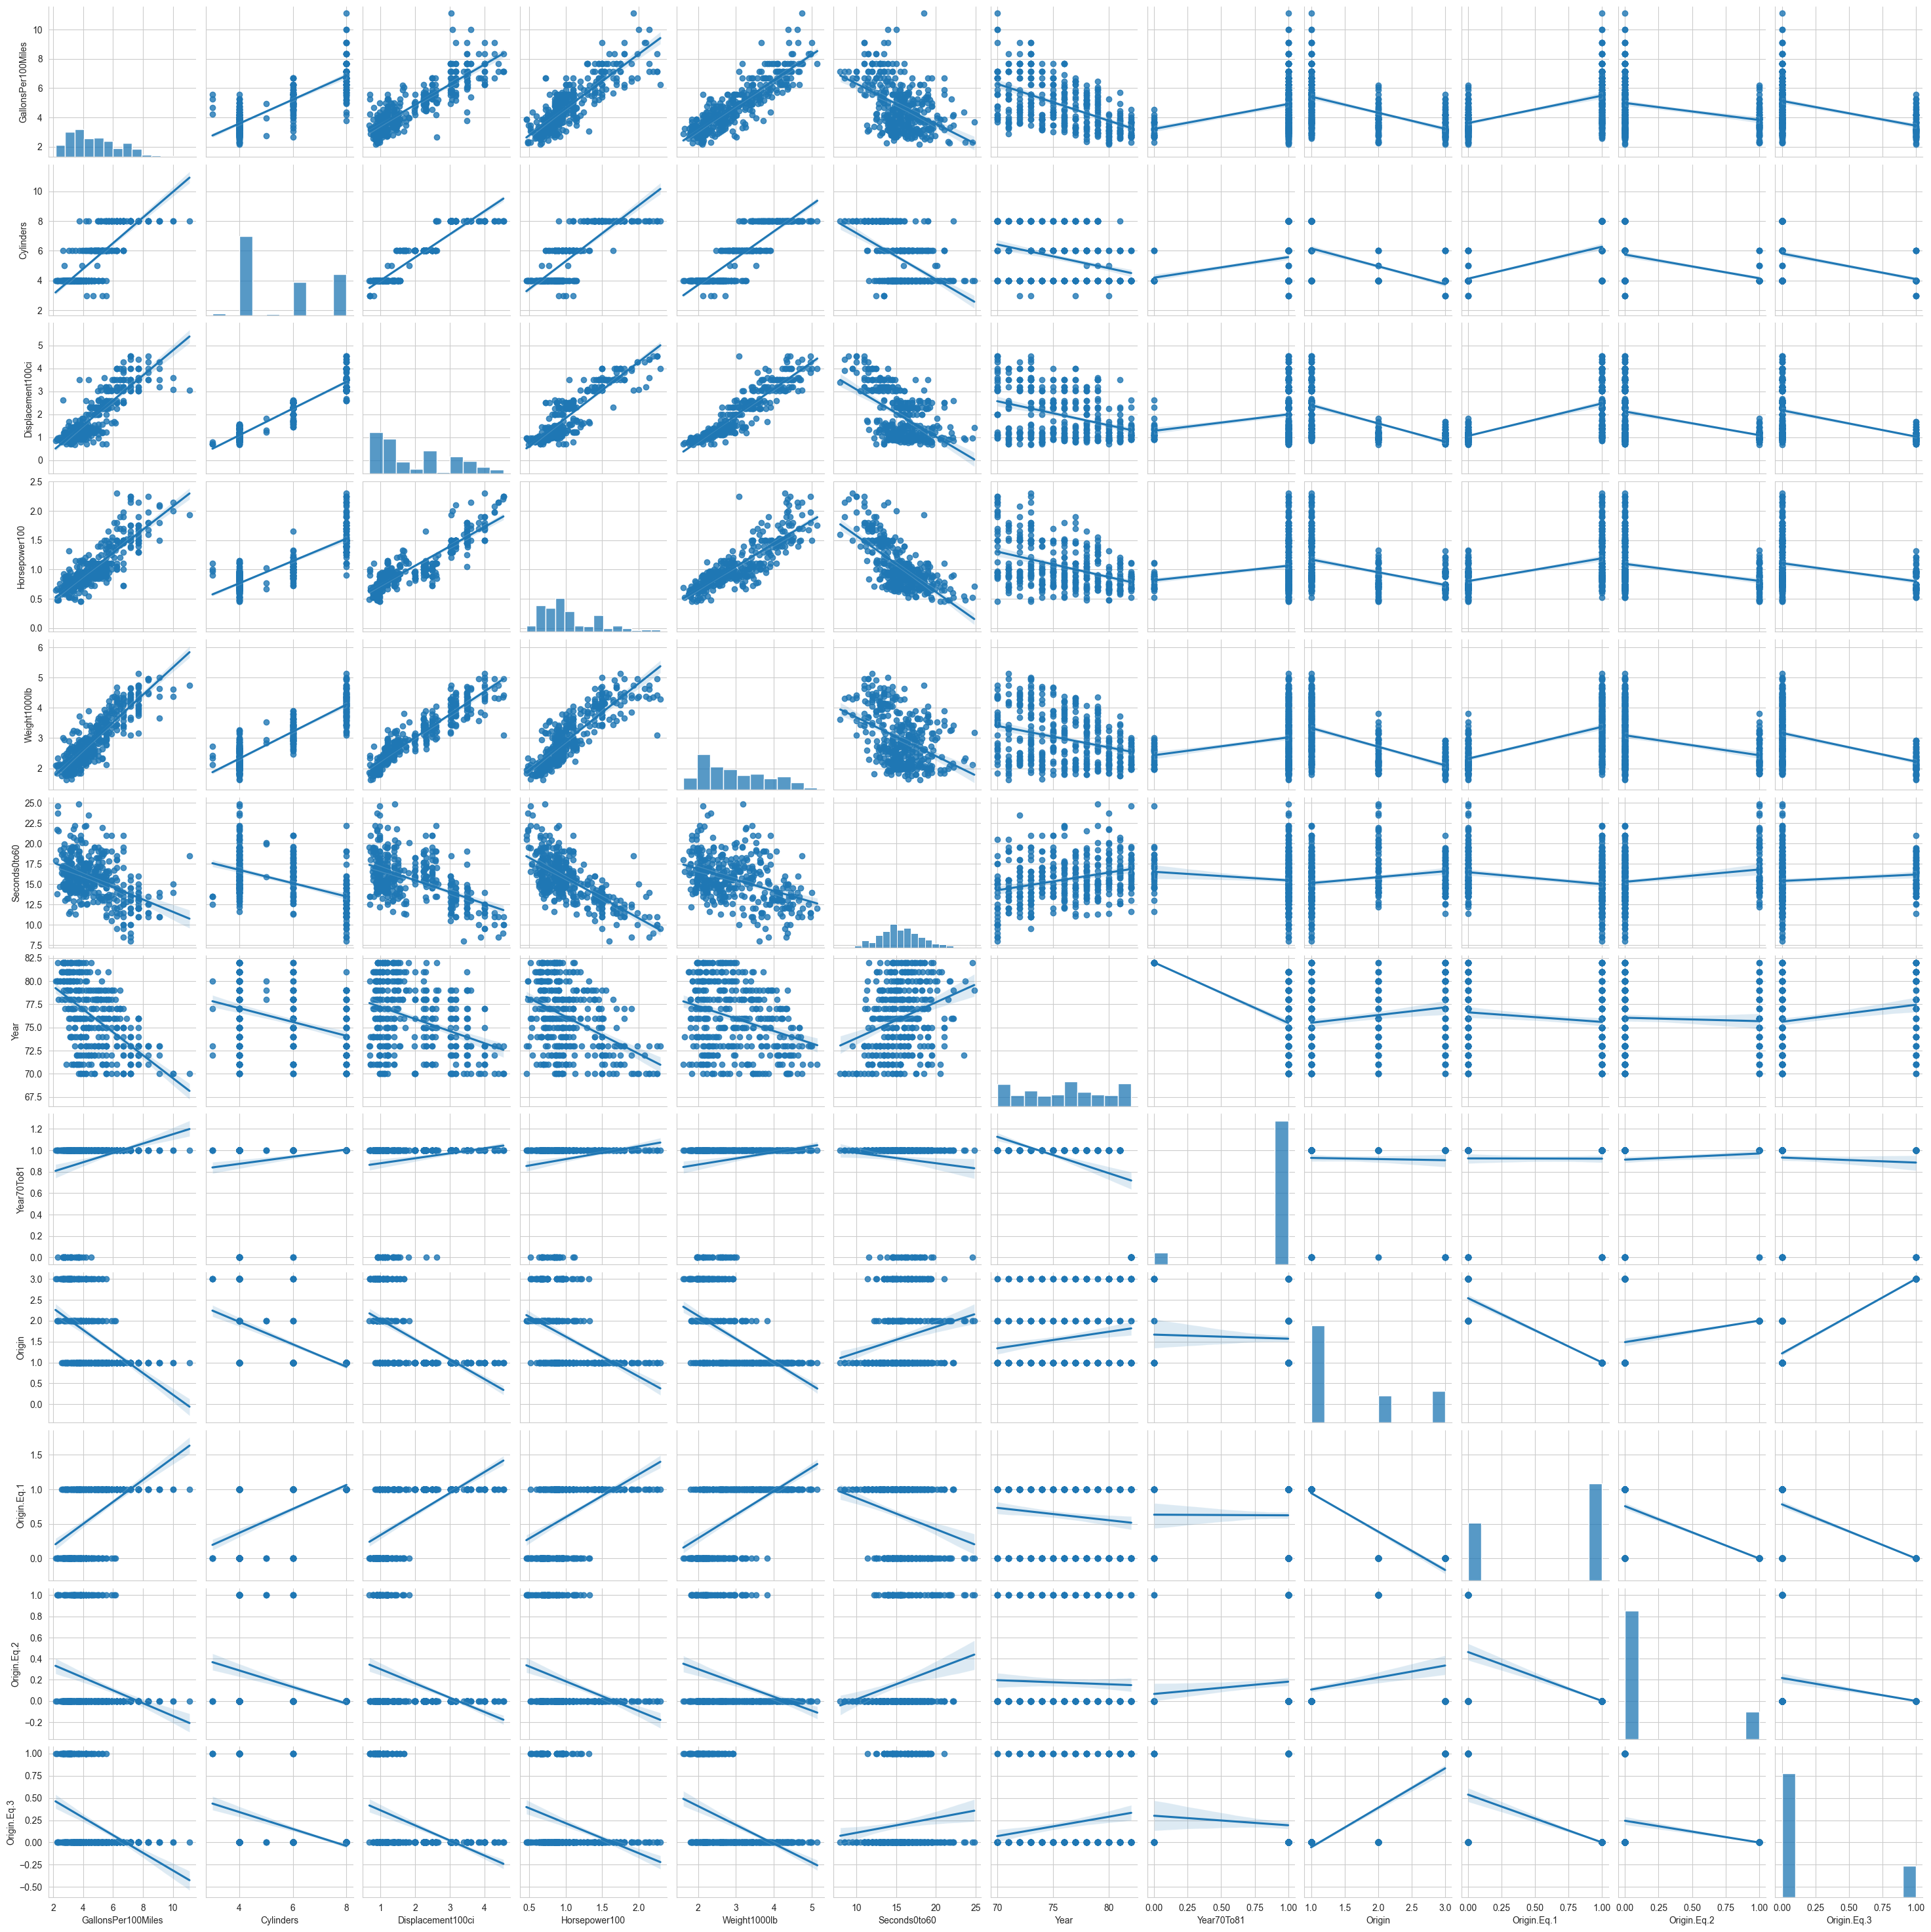

In [98]:
sns.pairplot(df, kind='reg')

## Train-test split

In [99]:
from sklearn.model_selection import train_test_split
X = df.drop(["GallonsPer100Miles"], axis=1)
y = df["GallonsPer100Miles"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0
1,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0
2,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0
3,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0
4,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0


### Model training

In [102]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
print('Coefficients:', model.coef_)  
print('Intercept:', model.intercept_)  


Coefficients: [ 0.16986052 -0.31712786  1.23251564  1.07489324  0.03344033 -0.14263161
 -0.09055998 -0.09132525  0.12353573 -0.15574622  0.03221049]
Intercept: 10.469437776496687


### Error terms

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.28234900280119485
R-squared: 0.8898340669110781


## Try to delete some params

In [103]:
X = df.drop(["GallonsPer100Miles", 'Origin', "Origin.Eq.1", "Origin.Eq.2", "Origin.Eq.3"], axis=1)
y = df["GallonsPer100Miles"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81
0,8,3.07,1.30,3.504,12.0,70,1
1,8,3.50,1.65,3.693,11.5,70,1
2,8,3.18,1.50,3.436,11.0,70,1
3,8,3.04,1.50,3.433,12.0,70,1
4,8,3.02,1.40,3.449,10.5,70,1


In [104]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Coefficients: [ 0.1560985  -0.12887146  1.05265044  1.06377763  0.03218916 -0.13928634
 -0.16805065]
Intercept: 10.154673918172136
Mean Squared Error: 0.2649672329065431
R-squared: 0.8966160242765502
